In [47]:
import pandas as pd
import numpy as np
from mlxtend.plotting import plot_decision_regions

In [48]:
df = pd.DataFrame()


### creating manual dataset

In [49]:
df['Feature1'] = [1,2,3,4,5,6,7,8,9]
df['Feature2'] = [5,3,6,8,1,9,5,8,9]
df['label']   = [1,1,0,1,0,1,0,0,1]
df

,Feature1,Feature2,label
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0
5,6,9,1
6,7,5,0
7,8,8,0
8,9,9,1


In [ ]:
df.shape

<Axes: xlabel='Feature1', ylabel='Feature2'>

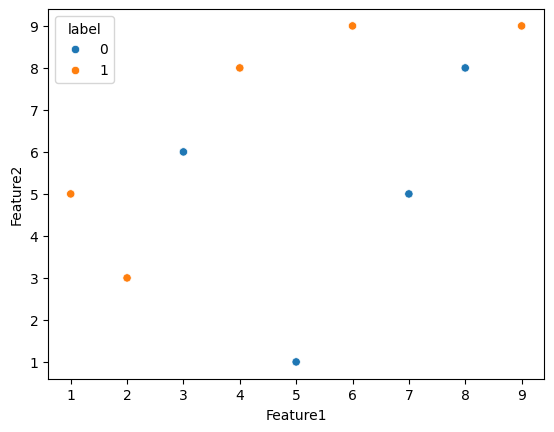

In [50]:
import seaborn as sns
sns.scatterplot(x=df['Feature1'],y=df['Feature2'],hue=df['label']) #here hue labels target

#### Weight initialization in the first iteration: 1/num_records

In [51]:
df['weights'] = 1/df.shape[0]
df

,Feature1,Feature2,label,weights
0,1,5,1,0.111111
1,2,3,1,0.111111
2,3,6,0,0.111111
3,4,8,1,0.111111
4,5,1,0,0.111111
5,6,9,1,0.111111
6,7,5,0,0.111111
7,8,8,0,0.111111
8,9,9,1,0.111111


In [52]:
from sklearn.tree import DecisionTreeClassifier


In [53]:
dt1 = DecisionTreeClassifier(max_depth=1)

#### Split the data into features and target label

In [54]:
df.columns

Index(['Feature1', 'Feature2', 'label', 'weights'], dtype='object')

In [58]:
# X - input features
# y - output features

X = df.iloc[:,0:2].values
y = df.iloc[:,2].values

In [59]:
X

array([[1, 5],
       [2, 3],
       [3, 6],
       [4, 8],
       [5, 1],
       [6, 9],
       [7, 5],
       [8, 8],
       [9, 9]])

In [60]:
y

array([1, 1, 0, 1, 0, 1, 0, 0, 1])

#### model training : M1

In [61]:
dt1 = DecisionTreeClassifier(max_depth=1)
dt1.fit(X, y)

DecisionTreeClassifier(max_depth=1)

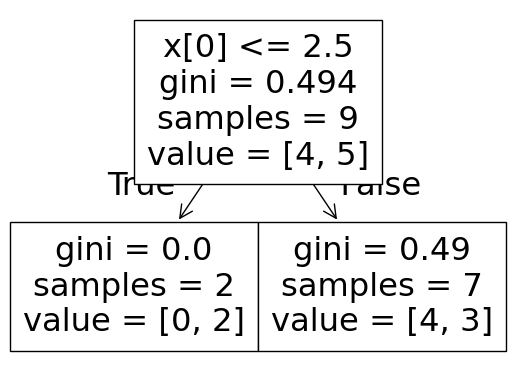

In [62]:
import matplotlib.pyplot as plt
plot_tree(dt1)
plt.show()

### Step 1: Initialize Weights


In [63]:
df['weights'] = 1 / df.shape[0]

### Step 2: Train the First Weak Learner

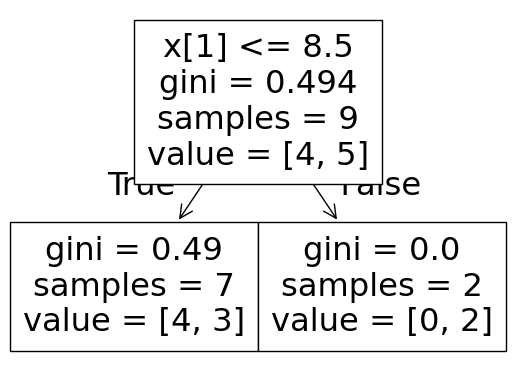

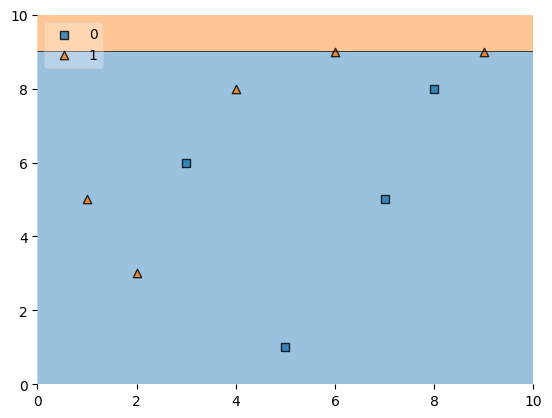

In [64]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
X = df.iloc[:, 0:2].values
y = df.iloc[:, 2].values

dt1 = DecisionTreeClassifier(max_depth=1)
dt1.fit(X, y)

plot_tree(dt1)
plt.show()

plot_decision_regions(X, y, clf=dt1, legend=2)
plt.show()

df['y_pred'] = dt1.predict(X)

### Step 3: Calculate Model Weight (Alpha)

In [65]:
def calculate_model_weight(error):
    return 0.5 * np.log((1 - error) / error)

error1 = 0.3
alpha1 = calculate_model_weight(error1)
alpha1

np.float64(0.42364893019360184)

### Step 4: Update Weights

In [70]:
def update_row_weights(row, alpha):
    if row['label'] == row['y_pred']:
        return row['weights'] * np.exp(-alpha)
    else:
        return row['weights'] * np.exp(alpha)

df['updated_weights'] = df.apply(update_row_weights, alpha=alpha1, axis=1)
df

df['normalized_weights'] = df['updated_weights'] / df['updated_weights'].sum()

### Step 5: Create a New Dataset


In [71]:
def create_new_dataset(df):
    indices = []
    for i in range(df.shape[0]):
        a = np.random.random()
        for index, row in df.iterrows():
            if row['cumsum_upper'] > a and a > row['cumsum_lower']:
                indices.append(index)
    return indices

df['cumsum_upper'] = np.cumsum(df['normalized_weights'])
df['cumsum_lower'] = df['cumsum_upper'] - df['normalized_weights']
index_values = create_new_dataset(df)
new_df = df.iloc[index_values, [0, 1, 2, 3]]
new_df

,Feature1,Feature2,label,weights
3,4,8,1,0.111111
3,4,8,1,0.111111
1,2,3,1,0.111111
5,6,9,1,0.111111
3,4,8,1,0.111111
6,7,5,0,0.111111
6,7,5,0,0.111111
0,1,5,1,0.111111
1,2,3,1,0.111111


### Step 6: Train the Second Weak Learner

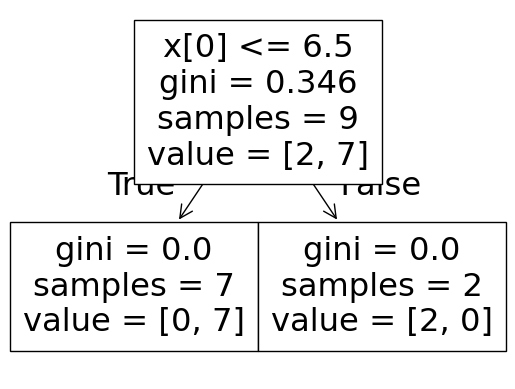

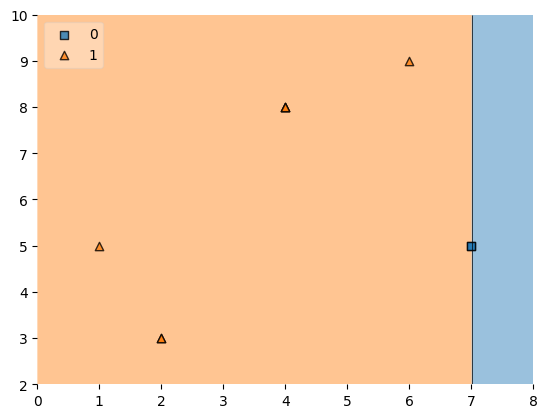

np.float64(1.0986122886681098)

In [72]:
X_new = new_df.iloc[:, 0:2].values
y_new = new_df.iloc[:, 2].values

dt2 = DecisionTreeClassifier(max_depth=1)
dt2.fit(X_new, y_new)

plot_tree(dt2)
plt.show()

plot_decision_regions(X_new, y_new, clf=dt2, legend=2)
plt.show()

new_df['y_pred'] = dt2.predict(X_new)
new_df

error2 = 0.1
alpha2 = calculate_model_weight(error2)
alpha2

### Step 7: Update Weights Again

In [73]:
new_df['updated_weights'] = new_df.apply(update_row_weights, alpha=alpha2, axis=1)

new_df['normalized_weights'] = new_df['updated_weights'] / new_df['updated_weights'].sum()
new_df

,Feature1,Feature2,label,weights,y_pred,updated_weights,normalized_weights
3,4,8,1,0.111111,1,0.037037,0.111111
3,4,8,1,0.111111,1,0.037037,0.111111
1,2,3,1,0.111111,1,0.037037,0.111111
5,6,9,1,0.111111,1,0.037037,0.111111
3,4,8,1,0.111111,1,0.037037,0.111111
6,7,5,0,0.111111,0,0.037037,0.111111
6,7,5,0,0.111111,0,0.037037,0.111111
0,1,5,1,0.111111,1,0.037037,0.111111
1,2,3,1,0.111111,1,0.037037,0.111111


### Step 8: Train the Third-Weak Learner

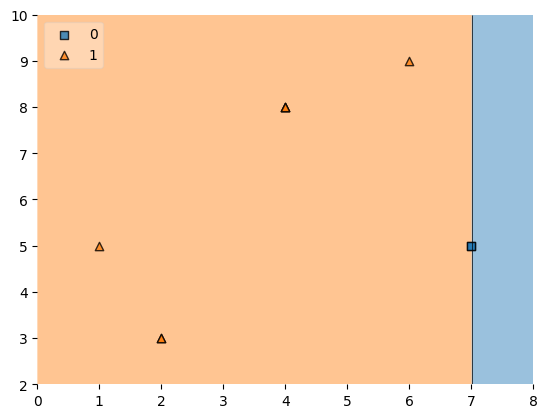

np.float64(-0.4236489301936017)

In [74]:
X_new = new_df.iloc[:, 0:2].values
y_new = new_df.iloc[:, 2].values

dt3 = DecisionTreeClassifier(max_depth=1)
dt3.fit(X_new, y_new)

plot_decision_regions(X_new, y_new, clf=dt3, legend=2)
plt.show()

new_df['y_pred'] = dt3.predict(X_new)
new_df

error3 = 0.7
alpha3 = calculate_model_weight(error3)
alpha3

### Final Strong Classifier

In [75]:
def final_prediction(query, classifiers, alphas):
    predictions = np.array([clf.predict(query) for clf in classifiers])
    final_score = np.dot(alphas, predictions)
    return np.sign(final_score)

classifiers = [dt1, dt2, dt3]
alphas = [alpha1, alpha2, alpha3]

query1 = np.array([1, 5]).reshape(1, -1)
query2 = np.array([9, 9]).reshape(1, -1)

print(final_prediction(query1, classifiers, alphas))
print(final_prediction(query2, classifiers, alphas))

[1.]
[1.]
